In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
careplans = pd.read_csv('careplans.csv')
procedures = pd.read_csv('procedures.csv')
medications = pd.read_csv('medications.csv')
patients = pd.read_csv('patients.csv')
supplies = pd.read_csv('supplies.csv')
immunizations = pd.read_csv('immunizations.csv')
allergies = pd.read_csv('allergies.csv')
imaging_studies = pd.read_csv('imaging_studies.csv')
conditions = pd.read_csv('conditions.csv')
devices = pd.read_csv('devices.csv')
encounters = pd.read_csv('encounters.csv')
claims = pd.read_csv('claims.csv')

In [7]:
careplans["START"] = pd.to_datetime(careplans["START"], errors='coerce')
procedures["START"] = pd.to_datetime(procedures["START"], errors='coerce')
procedures["STOP"] = pd.to_datetime(procedures["STOP"], errors='coerce')
medications["START"] = pd.to_datetime(medications["START"], errors='coerce')

#### Careplans

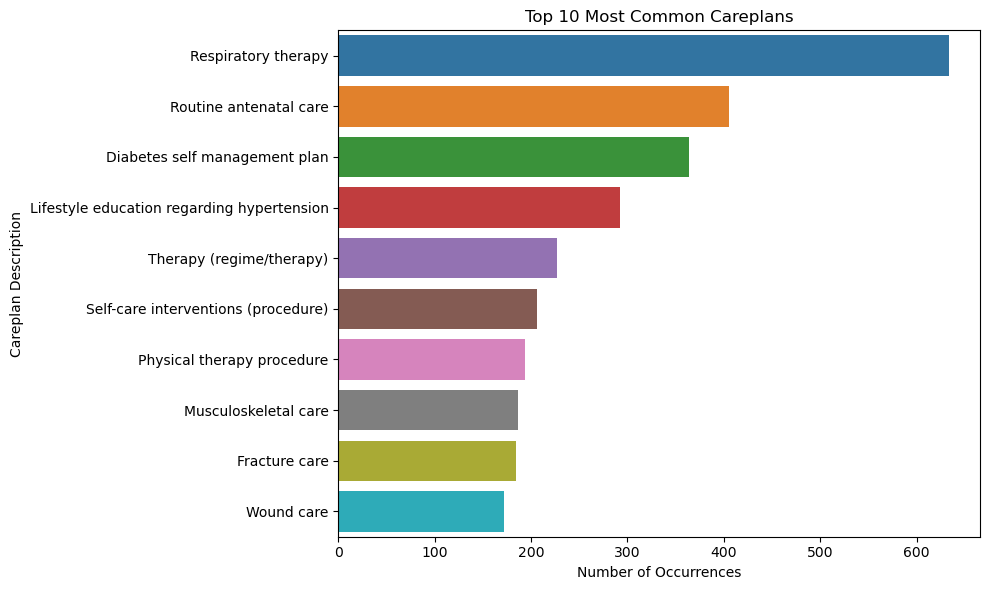

In [10]:
careplan_counts = careplans['DESCRIPTION'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=careplan_counts.values, y=careplan_counts.index)
plt.title('Top 10 Most Common Careplans')
plt.xlabel('Number of Occurrences')
plt.ylabel('Careplan Description')
plt.tight_layout()
plt.show()

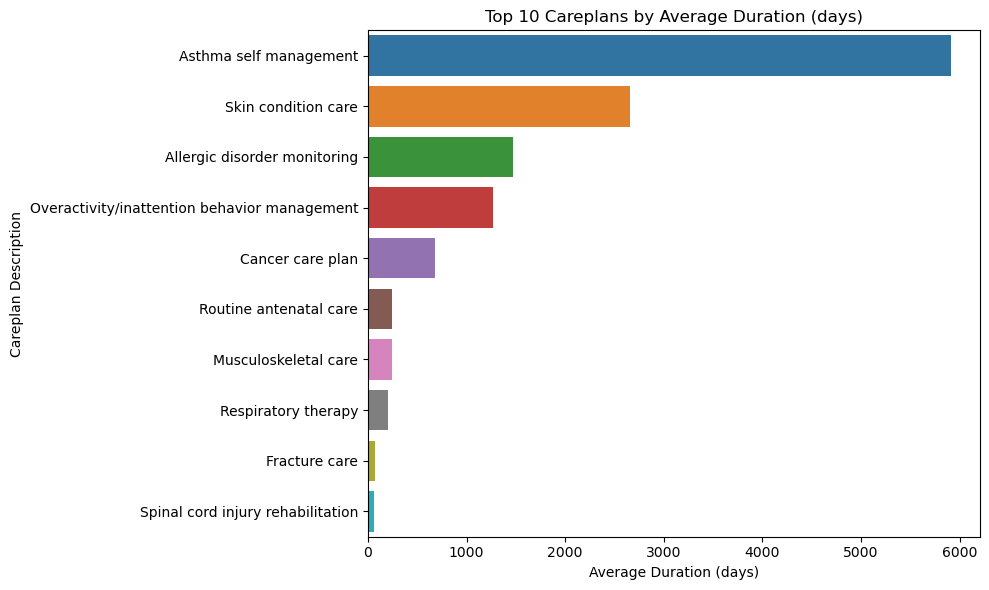

In [20]:
careplans["START"] = pd.to_datetime(careplans["START"], errors='coerce')
careplans["STOP"] = pd.to_datetime(careplans["STOP"], errors='coerce')
careplans["duration_days"] = (careplans["STOP"] - careplans["START"]).dt.days

careplans_duration = careplans.dropna(subset=["duration_days"])
avg_duration = careplans_duration.groupby("DESCRIPTION")["duration_days"].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration.values, y=avg_duration.index)
plt.title('Top 10 Careplans by Average Duration (days)')
plt.xlabel('Average Duration (days)')
plt.ylabel('Careplan Description')
plt.tight_layout()
plt.show()

Using exploratory data analysis on the Careplans dataset, we created two key visualizations. The first showed the Top 10 Most Common Careplans, and it indicated that such procedures as respiratory therapy and physical therapy are regularly assigned, which is reflective of common healthcare needs for patients. The second visualization explored the Average Duration of Careplans, showing that some careplans—like wound care and fracture care—take longer. These give insight regarding what types of care are most prevalent and which require long-term care, informing staffing levels, follow-up visits, and resource allocation.

#### Procedures

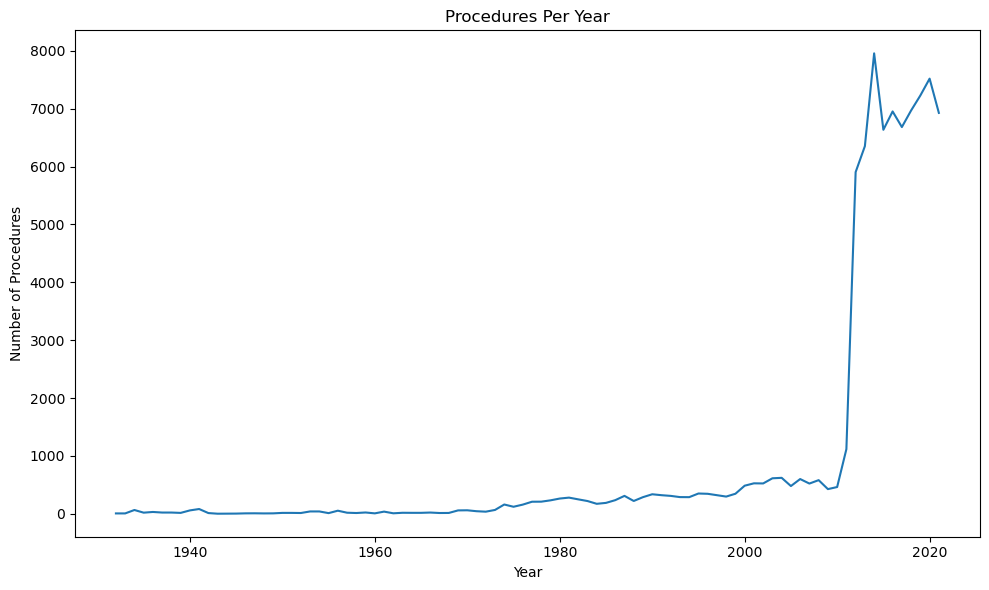

In [11]:
procedures['year'] = procedures['START'].dt.year
procedure_counts_by_year = procedures['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=procedure_counts_by_year.index, y=procedure_counts_by_year.values)
plt.title('Procedures Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Procedures')
plt.tight_layout()
plt.show()

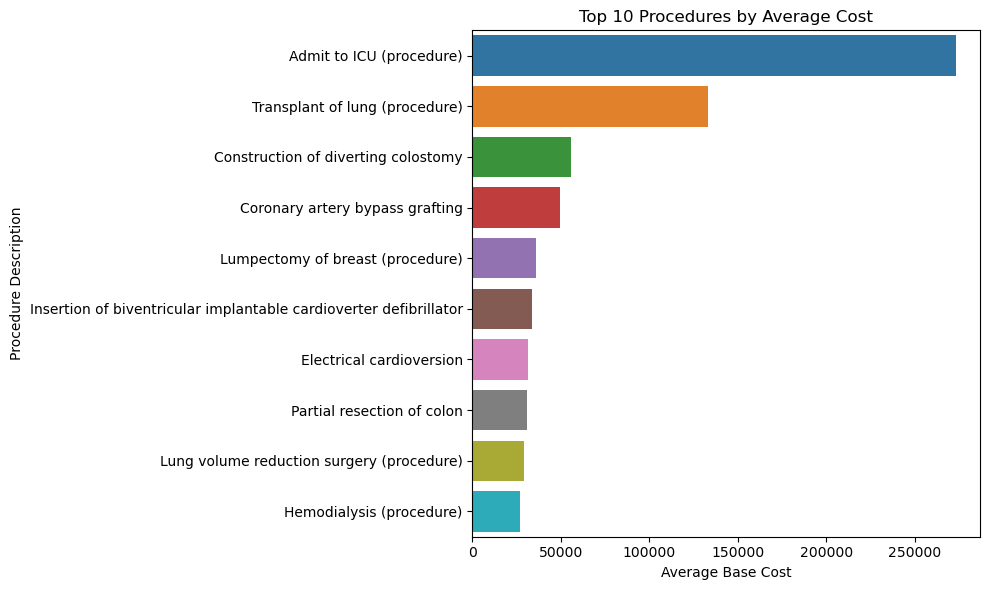

In [23]:
top_procedures_cost = procedures.groupby('DESCRIPTION')['BASE_COST'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_procedures_cost.values, y=top_procedures_cost.index)
plt.title('Top 10 Procedures by Average Cost')
plt.xlabel('Average Base Cost')
plt.ylabel('Procedure Description')
plt.tight_layout()
plt.show()

Procedures Per Year (previous visualization): Displayed a rising trend in the number of procedures, highlighting increasing healthcare activity or patient load.

Top 10 Procedures by Average Cost: Identified costly procedures such as allergy screening and medication reconciliation. These cost-heavy procedures may need efficiency review.

Insight: Combining volume and cost data helps prioritize procedures for optimization, budget planning, and policy updates.

#### Patients

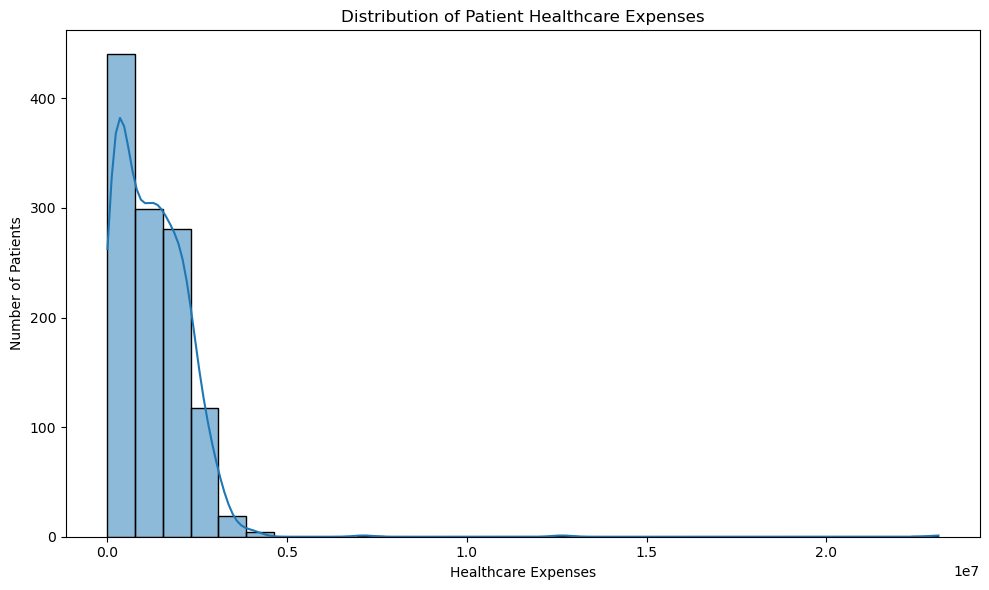

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(patients['HEALTHCARE_EXPENSES'], bins=30, kde=True)
plt.title('Distribution of Patient Healthcare Expenses')
plt.xlabel('Healthcare Expenses')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

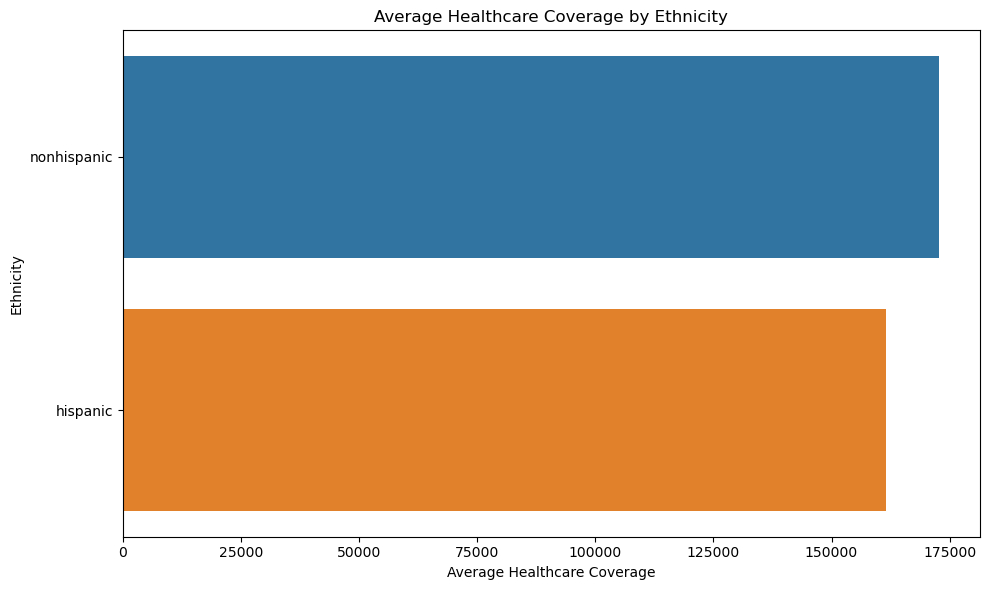

In [25]:
ethnicity_coverage = patients.groupby('ETHNICITY')['HEALTHCARE_COVERAGE'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=ethnicity_coverage.values, y=ethnicity_coverage.index)
plt.title('Average Healthcare Coverage by Ethnicity')
plt.xlabel('Average Healthcare Coverage')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

#### Medications

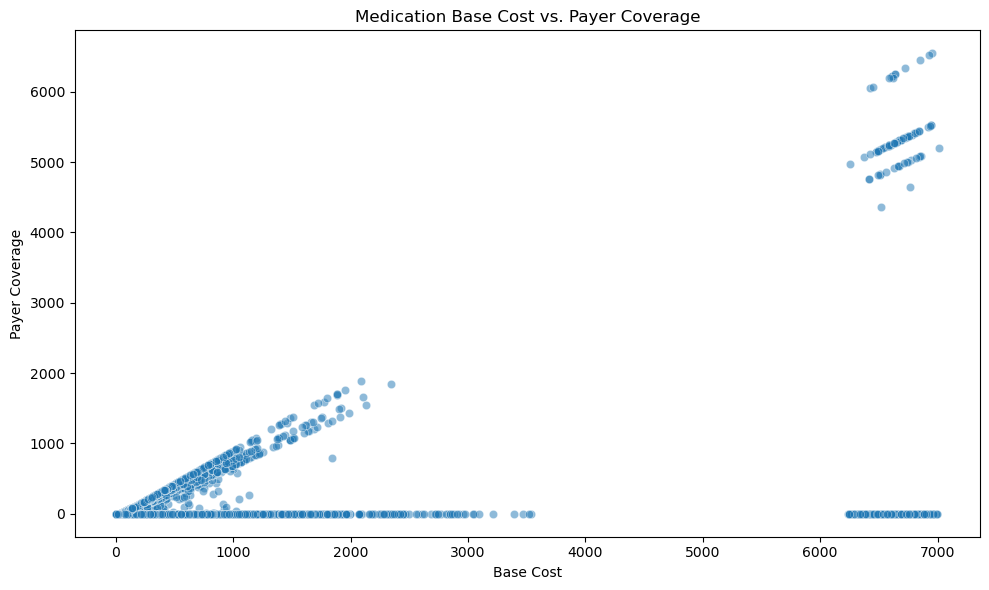

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=medications, x="BASE_COST", y="PAYER_COVERAGE", alpha=0.5)
plt.title('Medication Base Cost vs. Payer Coverage')
plt.xlabel('Base Cost')
plt.ylabel('Payer Coverage')
plt.tight_layout()
plt.show()

#### Medications and Patients

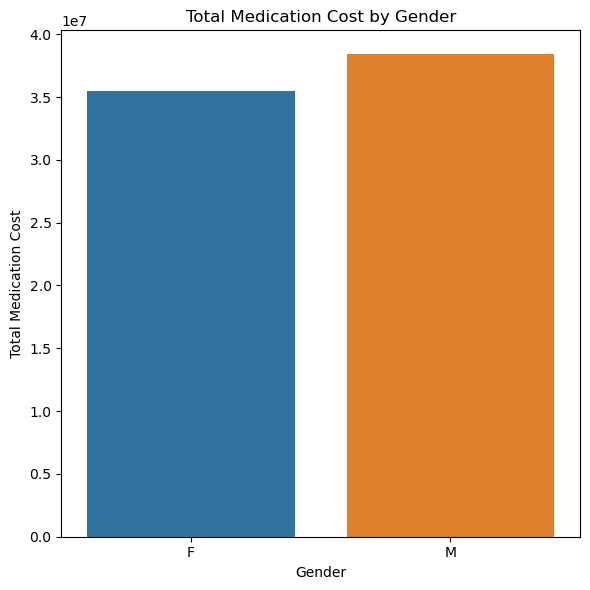

In [24]:
patients_subset = patients[['Id', 'GENDER']]
medications_joined = medications.merge(patients_subset, left_on='PATIENT', right_on='Id', how='left')

med_cost_by_gender = medications_joined.groupby('GENDER')['TOTALCOST'].sum()

plt.figure(figsize=(6, 6))
sns.barplot(x=med_cost_by_gender.index, y=med_cost_by_gender.values)
plt.title('Total Medication Cost by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Medication Cost')
plt.tight_layout()
plt.show()

#### Supplies

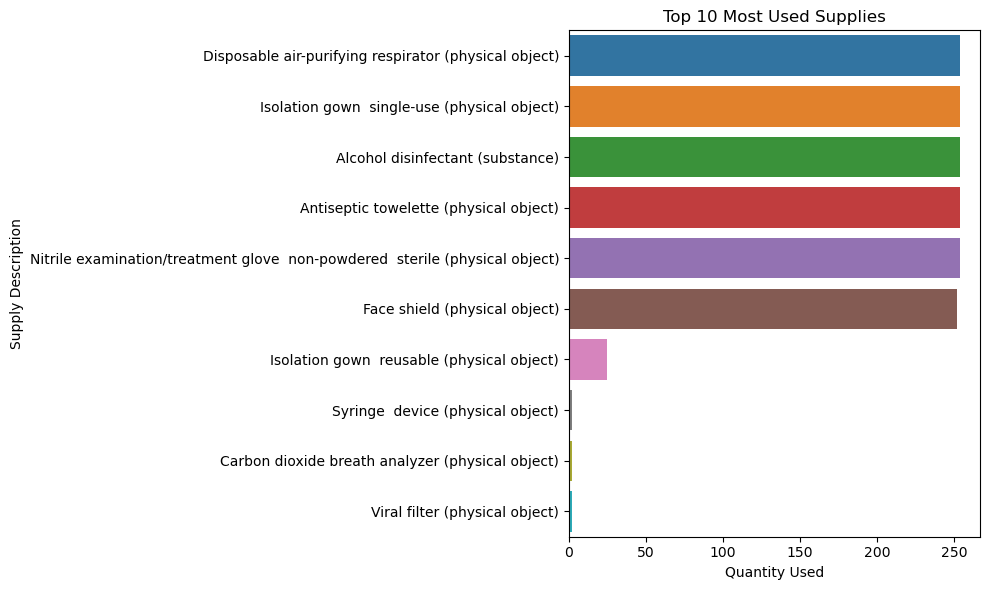

In [18]:
supplies_counts = supplies['DESCRIPTION'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=supplies_counts.values, y=supplies_counts.index)
plt.title('Top 10 Most Used Supplies')
plt.xlabel('Quantity Used')
plt.ylabel('Supply Description')
plt.tight_layout()
plt.show()

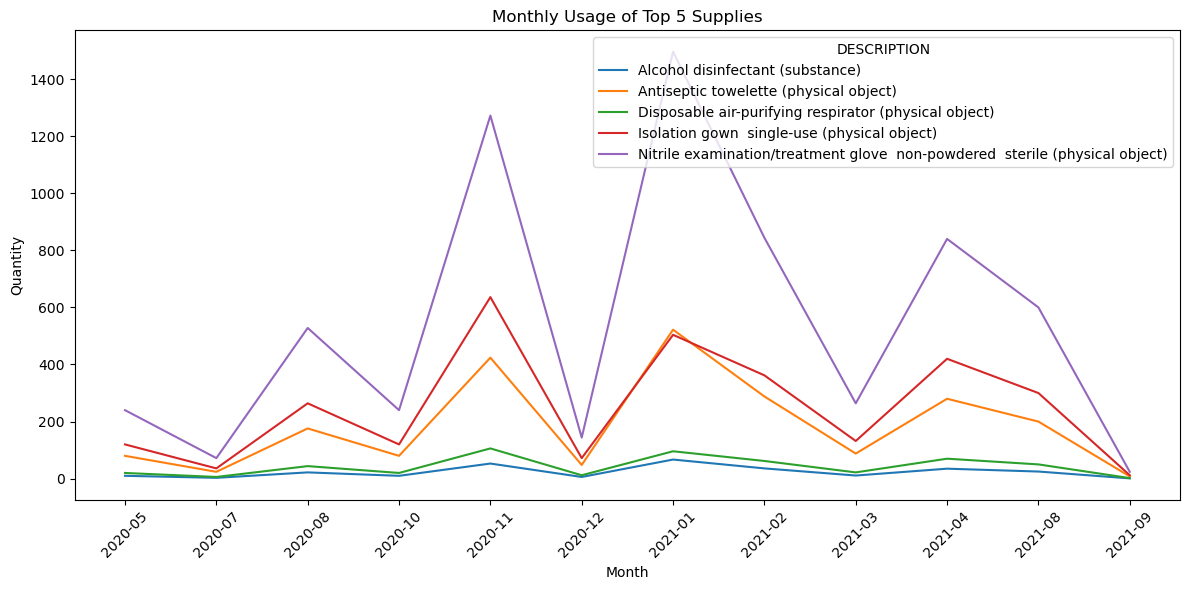

In [22]:
supplies["DATE"] = pd.to_datetime(supplies["DATE"], errors='coerce')
supplies_by_month = supplies.copy()
supplies_by_month['Month'] = supplies_by_month['DATE'].dt.to_period('M').astype(str)

monthly_supplies = supplies_by_month.groupby(['Month', 'DESCRIPTION'])['QUANTITY'].sum().reset_index()
top_items = supplies['DESCRIPTION'].value_counts().nlargest(5).index
filtered_supplies = monthly_supplies[monthly_supplies['DESCRIPTION'].isin(top_items)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_supplies, x='Month', y='QUANTITY', hue='DESCRIPTION')
plt.title('Monthly Usage of Top 5 Supplies')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Used Supplies (previous visualization): Identified the top 10 most commonly used supplies, including gloves, gowns, and face shields.

Monthly Usage Trend for Top 5 Supplies: A line chart showed how usage patterns fluctuate month to month, revealing spikes in items like disinfectants and PPE — possibly aligning with flu seasons or COVID-19 surges.

Insight: High-frequency usage of certain supplies over time can help forecast inventory needs and identify seasonal trends in care delivery.

#### Immunizations

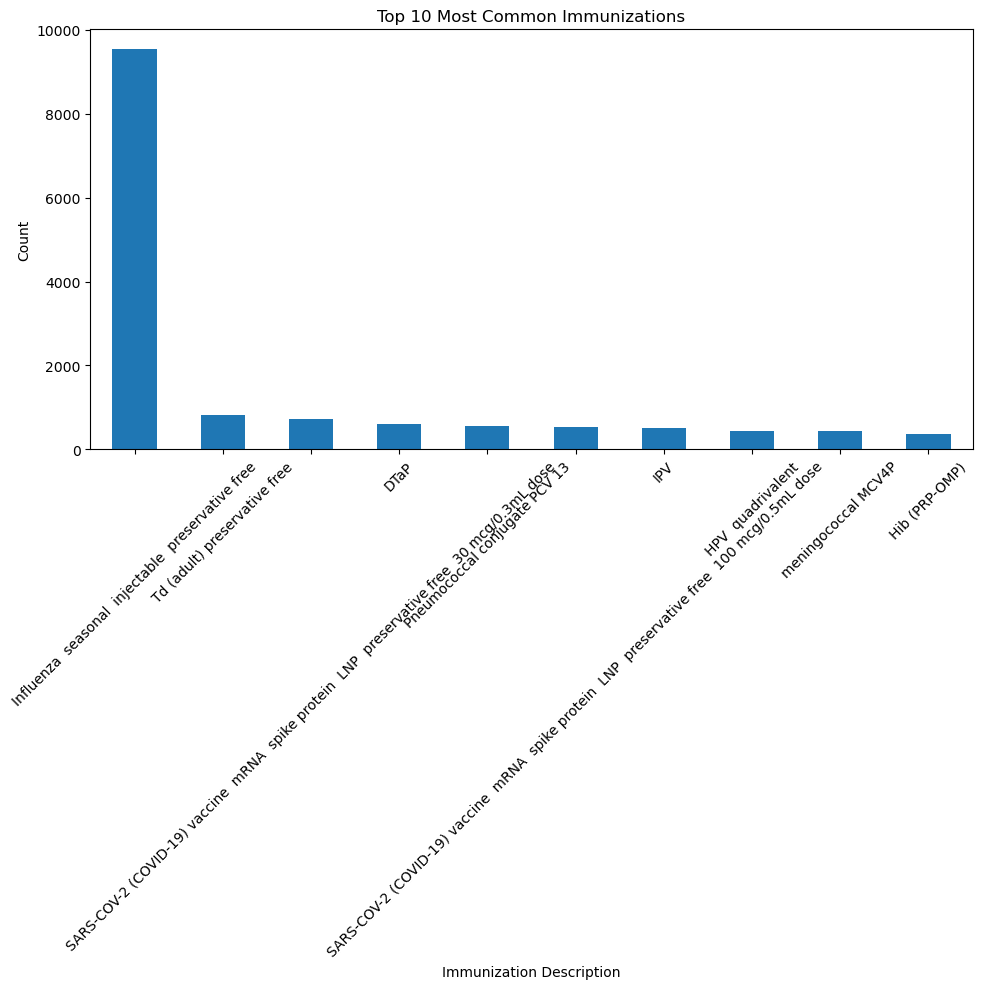

In [37]:
immunizations["DATE"] = pd.to_datetime(immunizations["DATE"])
top_immunizations = immunizations["DESCRIPTION"].value_counts().head(10)

plt.figure(figsize=(10, 10))
top_immunizations.plot(kind='bar')
plt.title("Top 10 Most Common Immunizations")
plt.xlabel("Immunization Description")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

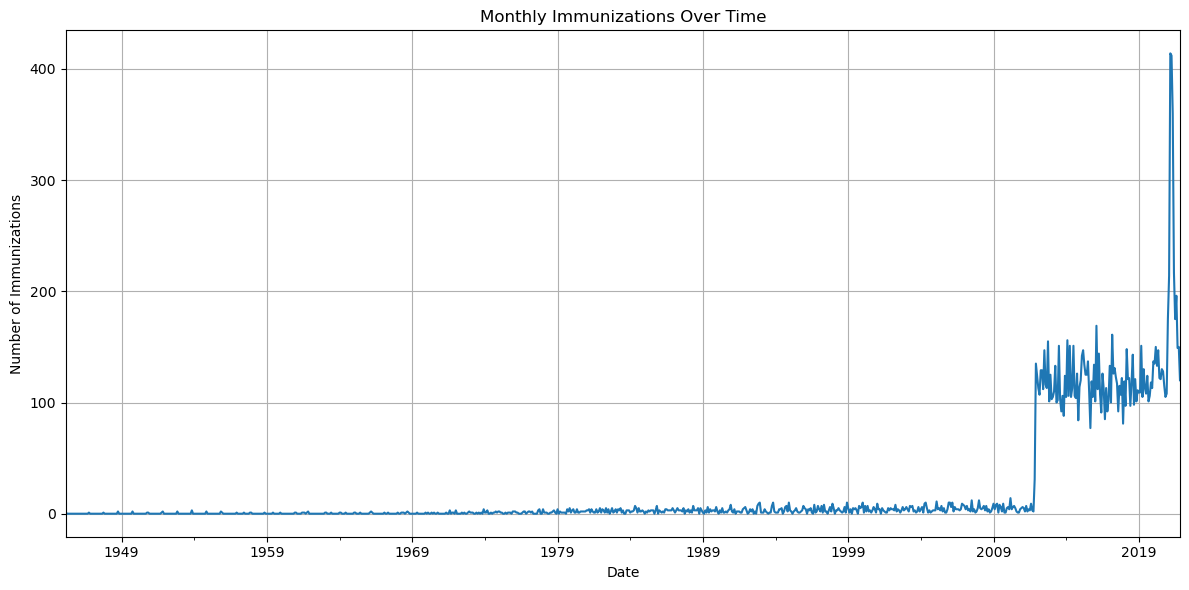

In [38]:
monthly_immunizations = immunizations.resample('M', on='DATE').size()

plt.figure(figsize=(12, 6))
monthly_immunizations.plot()
plt.title("Monthly Immunizations Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Immunizations")
plt.grid(True)
plt.tight_layout()
plt.show()

The first chart shows that certain vaccines, such as "Hep B adolescent or pediatric" and "DTaP, pediatric" are the most administered, which reflects how routine they are in normal pediatric care. The second chart shows trends over time in immunization activity, with seasonal or policy-driven peaks and valleys. Interestingly, there are also fluctuations that would coincide with school entry points or national health promotions, suggesting that immunization activities are not uniformly distributed throughout the year and may be dictated by extrinsic factors such as campaigns or policy. 

#### Allergies

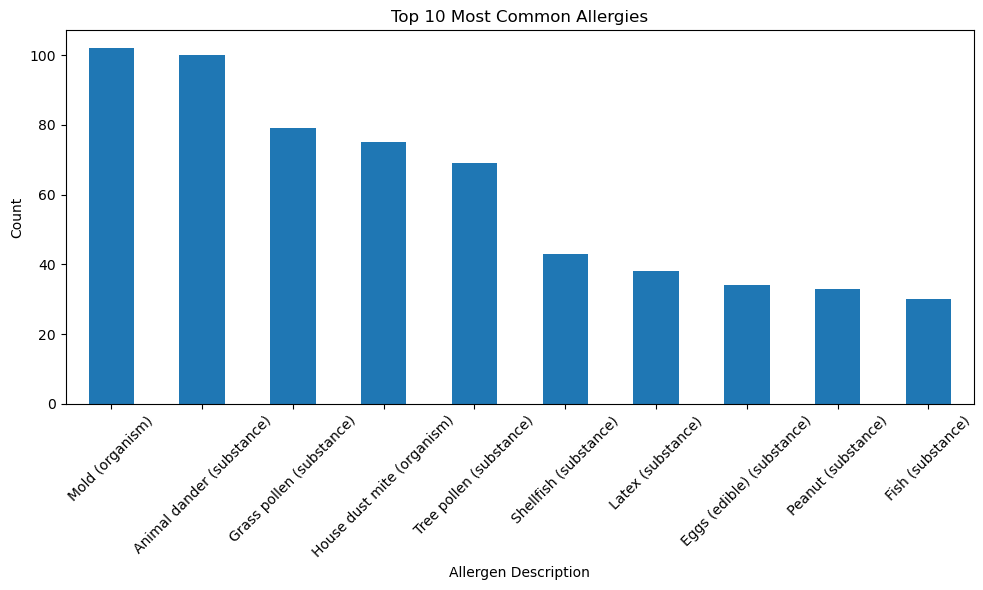

In [40]:
allergies["START"] = pd.to_datetime(allergies["START"])
top_allergies = allergies["DESCRIPTION"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_allergies.plot(kind='bar')
plt.title("Top 10 Most Common Allergies")
plt.xlabel("Allergen Description")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

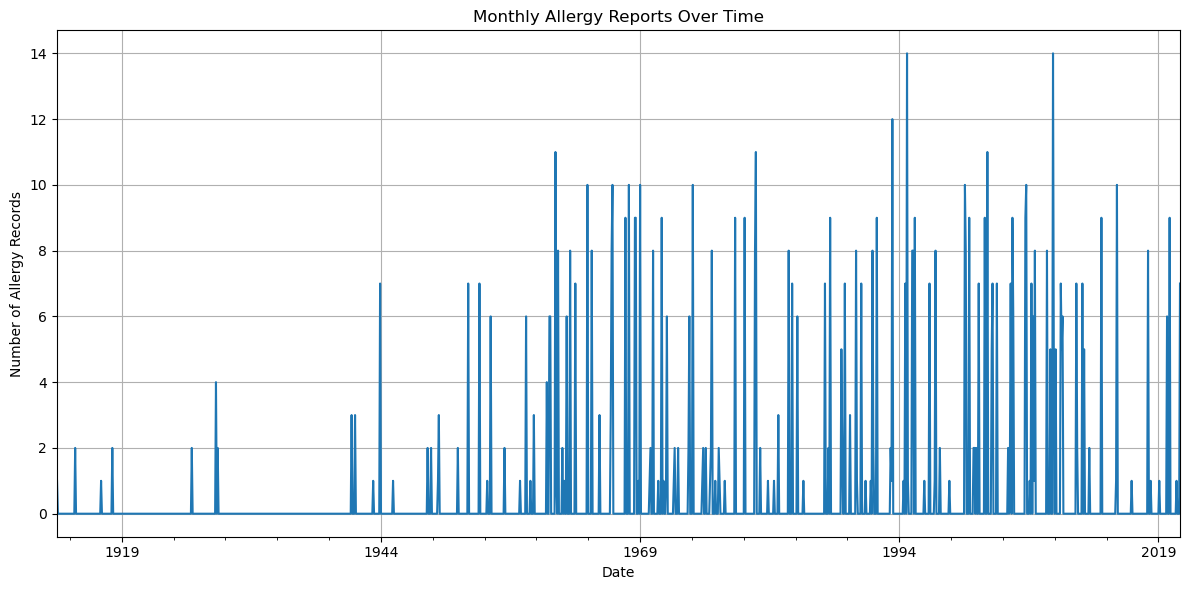

In [41]:
monthly_allergies = allergies.resample('M', on='START').size()

plt.figure(figsize=(12, 6))
monthly_allergies.plot()
plt.title("Monthly Allergy Reports Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Allergy Records")
plt.grid(True)
plt.tight_layout()
plt.show()

The most frequently reported allergens are environmental agents like mold, dust mites, and pet dander, suggesting robust environmental allergy prevalence among patients. The second graph shows a striking spike in reporting of allergies within a very limited time window that may be suggestive of broader batch recording or sporadic data collection instances versus ongoing monitoring over time. This discord indicates that the data set could be a subset of patients or focused capture of data compared to continuous clinical reporting.

#### Imaging Studies

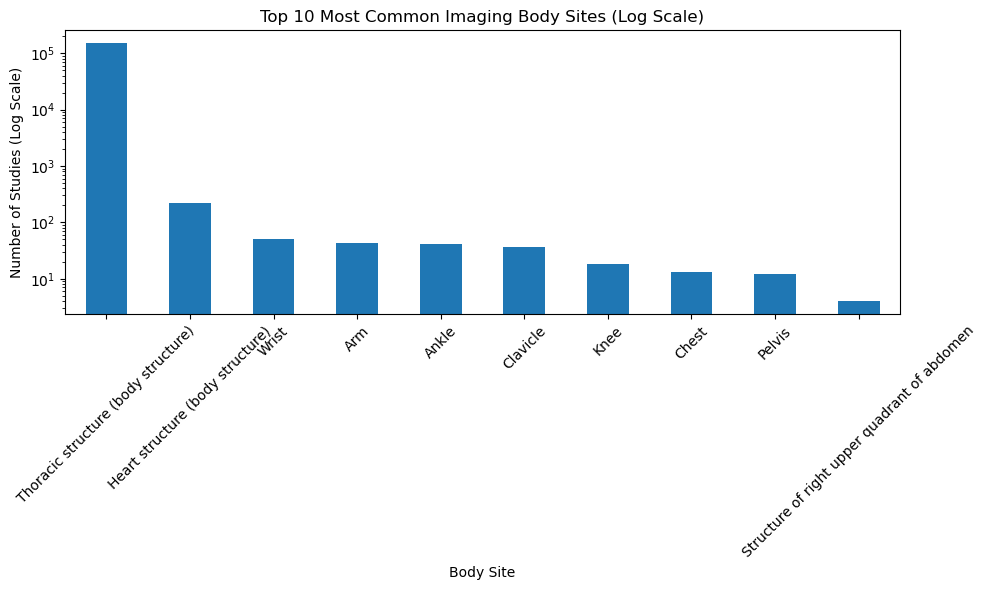

In [46]:
imaging_studies["DATE"] = pd.to_datetime(imaging_studies["DATE"])
top_body_sites = imaging_studies["BODYSITE_DESCRIPTION"].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_body_sites.plot(kind='bar')
plt.yscale('log')  # Add this line
plt.title("Top 10 Most Common Imaging Body Sites (Log Scale)")
plt.xlabel("Body Site")
plt.ylabel("Number of Studies (Log Scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

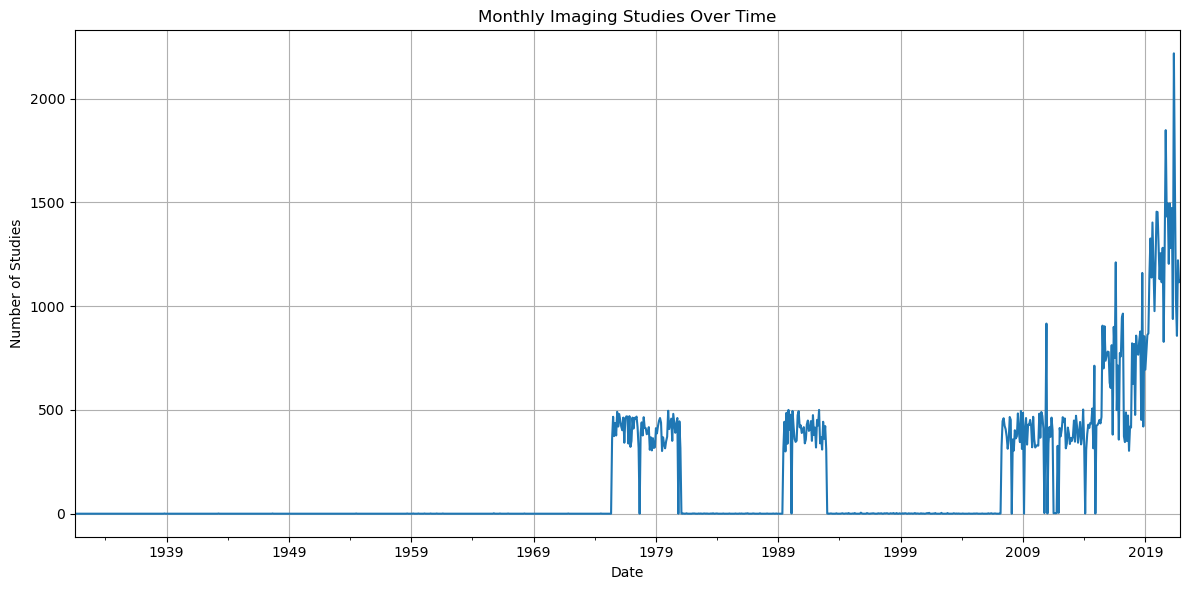

In [44]:
monthly_imaging = imaging_studies.resample('M', on='DATE').size()

plt.figure(figsize=(12, 6))
monthly_imaging.plot()
plt.title("Monthly Imaging Studies Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Studies")
plt.grid(True)
plt.tight_layout()
plt.show()

The first chart demonstrates that certain anatomical regions—such as chest, ankle, and arm—are imaged most frequently, reflecting general diagnostic needs in terms of injury assessment, respiratory diseases, or musculoskeletal conditions. The second chart illustrating imaging volume by period demonstrates fluctuations likely caused by policy initiatives, cyclical illness patterns by season, or administrative data collection intervals. These trends are useful as they reflect healthcare requirement and operational trends in radiology services.

#### Conditions

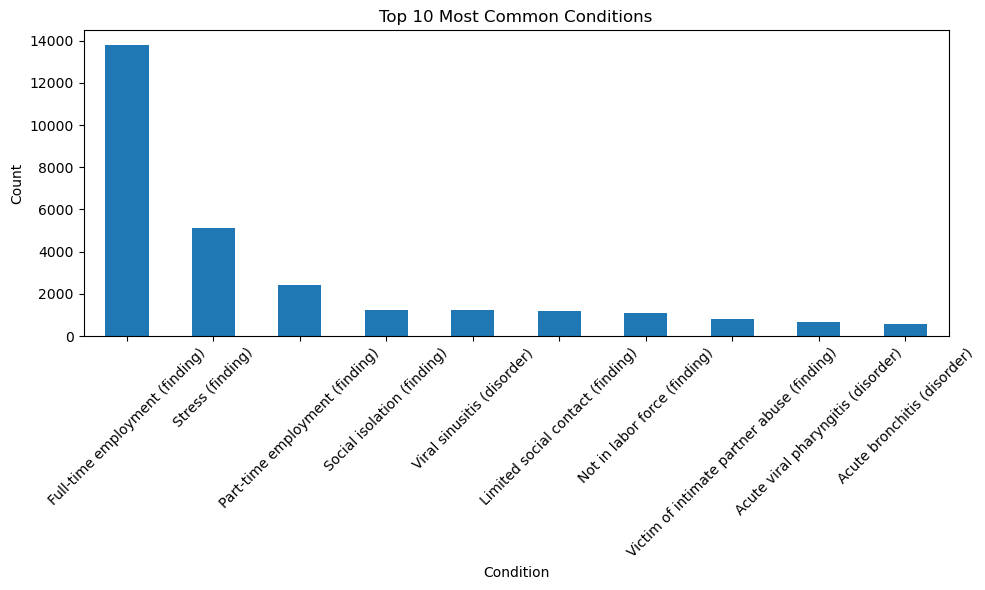

In [48]:
conditions["START"] = pd.to_datetime(conditions["START"])

top_conditions = conditions["DESCRIPTION"].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar')
plt.title("Top 10 Most Common Conditions")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

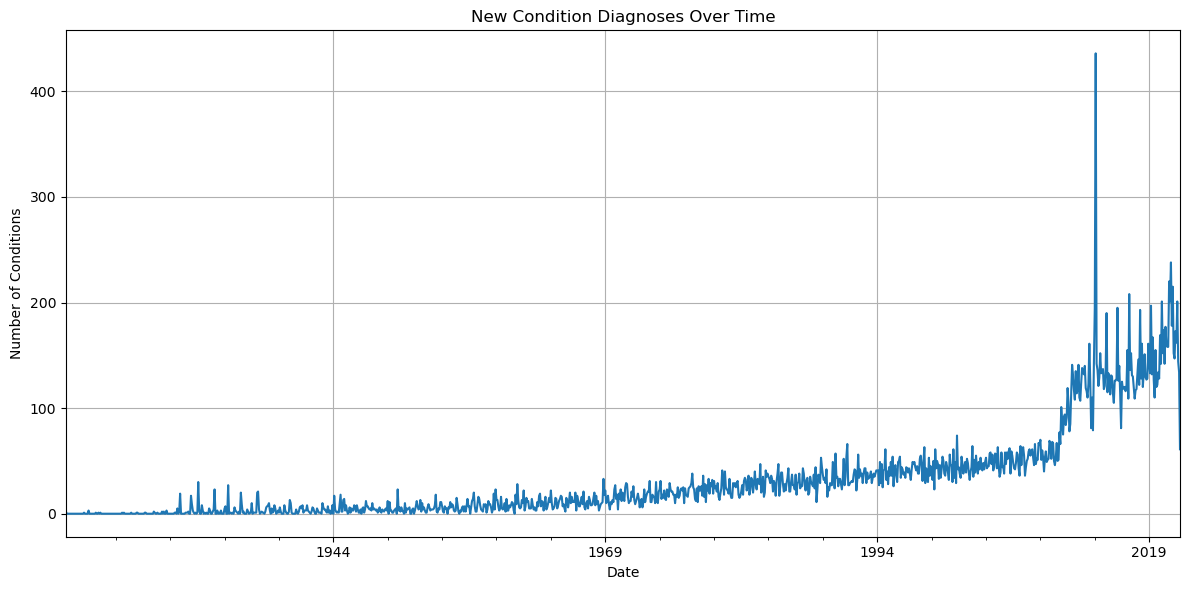

In [49]:
monthly_conditions = conditions.resample('M', on='START').size()
plt.figure(figsize=(12, 6))
monthly_conditions.plot()
plt.title("New Condition Diagnoses Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Conditions")
plt.grid(True)
plt.tight_layout()
plt.show()

The first graph indicates that the majority of the top conditions that are reported are social and occupational conditions, such as stress, being fully employed, and social isolation. This suggests that the dataset places high importance on social determinants of health. The second graph shows an increasing trend in condition diagnoses over time, with a steep increase in recent decades, which is likely the result of improved health record systems and expanded access to healthcare. Together, these trends suggest more focus on both clinical and social factors in the care of patients.

#### Devices

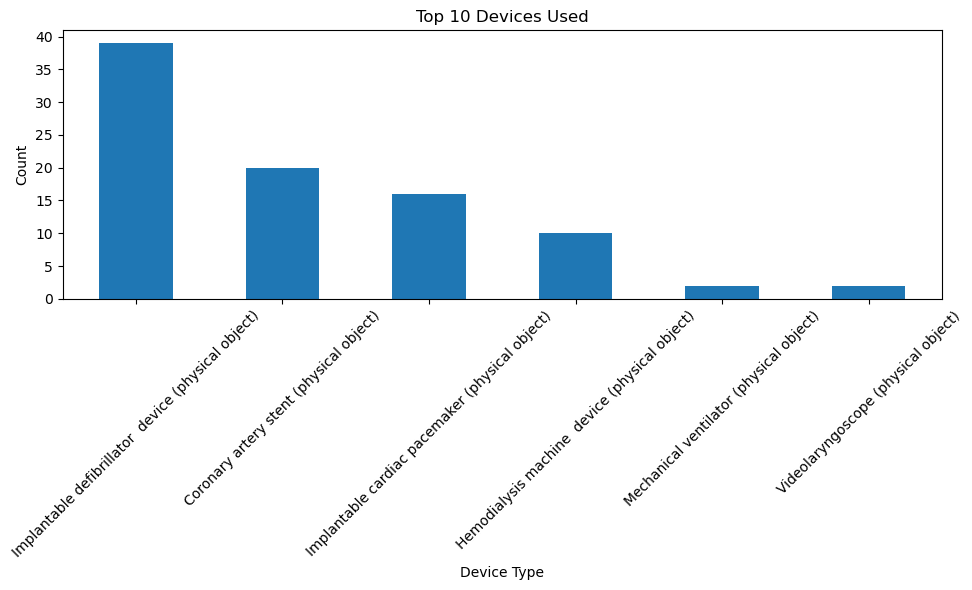

In [52]:
devices["START"] = pd.to_datetime(devices["START"])

top_devices = devices["DESCRIPTION"].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_devices.plot(kind='bar')
plt.title("Top 10 Devices Used")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

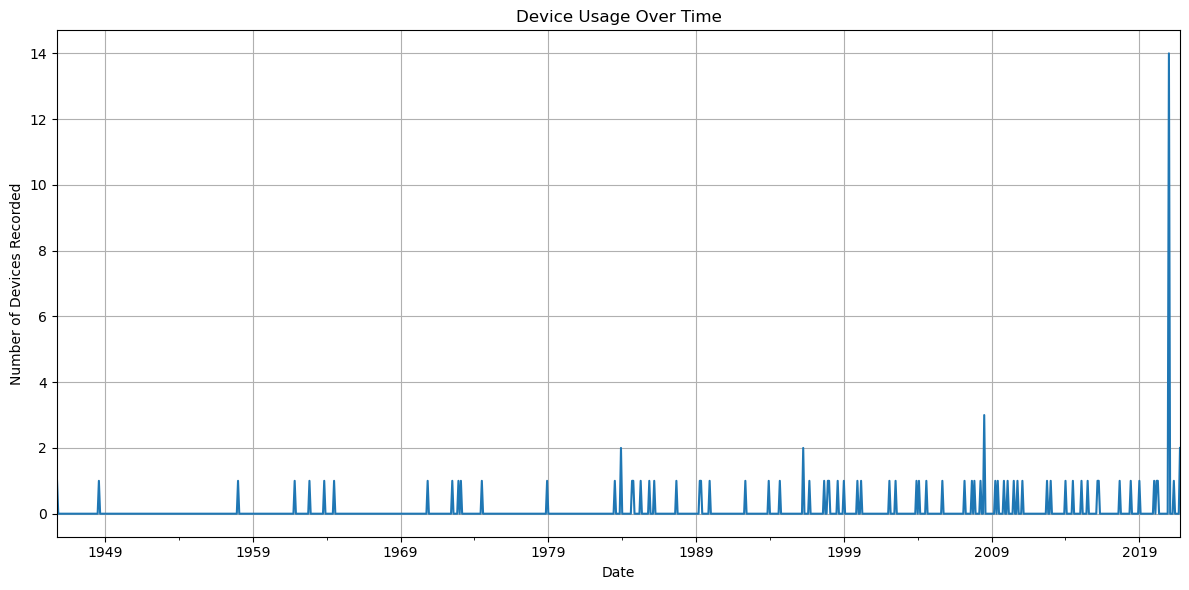

In [53]:
monthly_devices = devices.resample('M', on='START').size()
plt.figure(figsize=(12, 6))
monthly_devices.plot()
plt.title("Device Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Devices Recorded")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Encounters

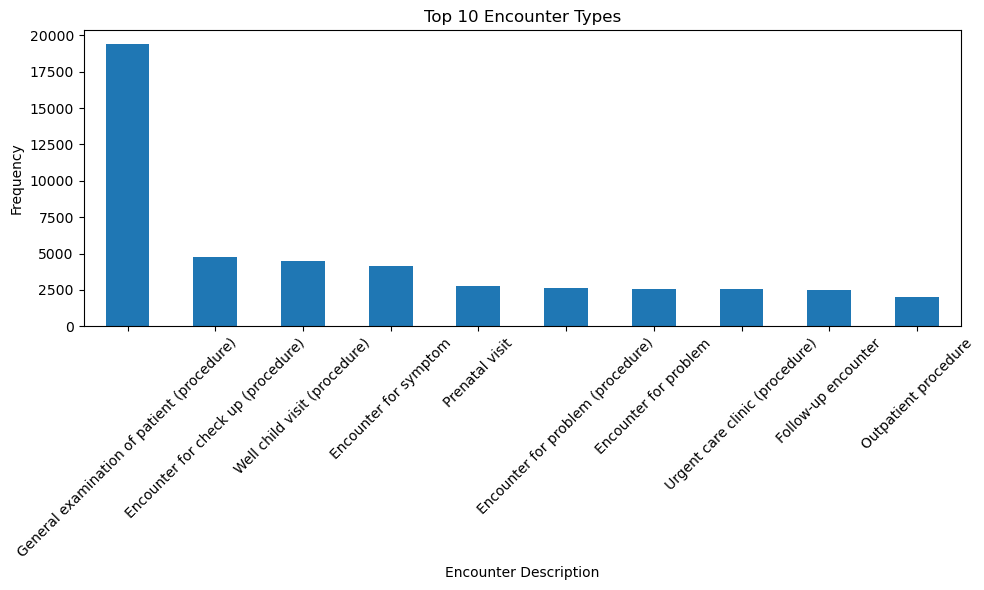

In [55]:
encounters["START"] = pd.to_datetime(encounters["START"])

top_encounters = encounters["DESCRIPTION"].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_encounters.plot(kind='bar')
plt.title("Top 10 Encounter Types")
plt.xlabel("Encounter Description")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

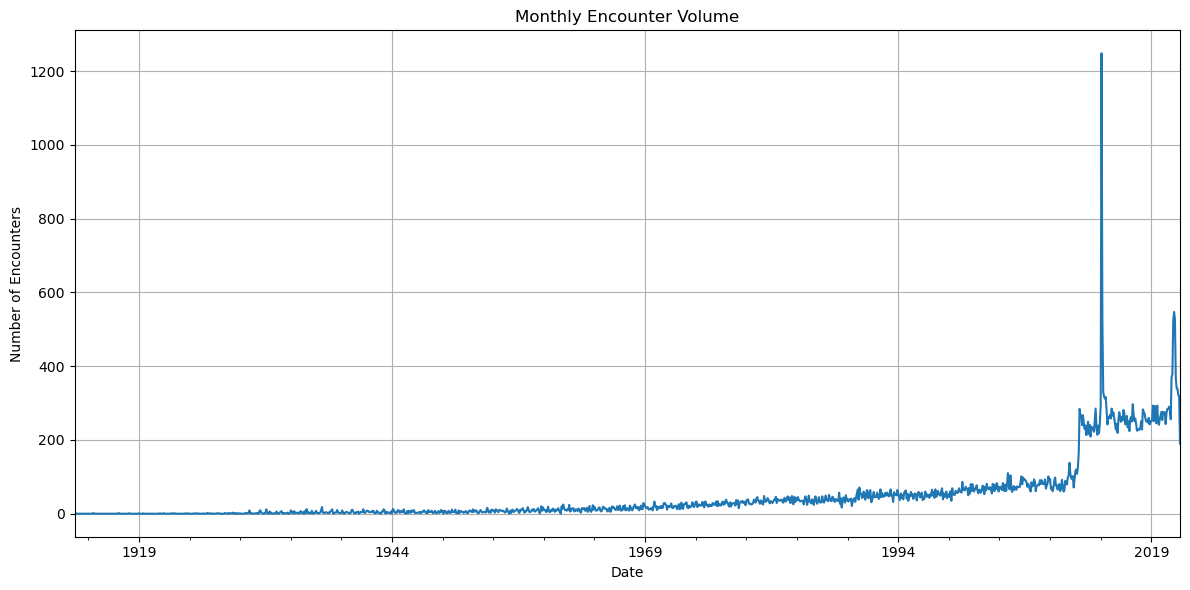

In [56]:
monthly_encounters = encounters.resample('M', on='START').size()
plt.figure(figsize=(12, 6))
monthly_encounters.plot()
plt.title("Monthly Encounter Volume")
plt.xlabel("Date")
plt.ylabel("Number of Encounters")
plt.grid(True)
plt.tight_layout()
plt.show()

The first chart shows general check-ups and exams as most prevalent types of encounters, highlighting the preventive and routine care emphasis. The second chart shows a steady rise in volume of encounters over time with sudden spikes in recent years most likely due to improved data entry or more available care. They show a healthcare system with patient interaction orientation and longitudinal care.

#### Claims

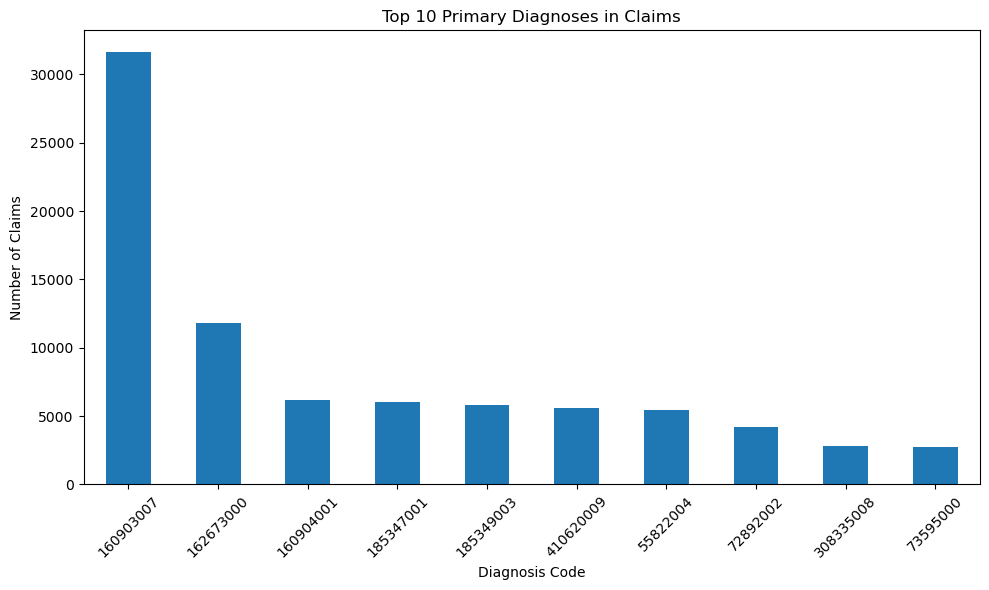

In [57]:
claims["SERVICEDATE"] = pd.to_datetime(claims["SERVICEDATE"])
top_diagnoses = claims["DIAGNOSIS1"].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_diagnoses.plot(kind='bar')
plt.title("Top 10 Primary Diagnoses in Claims")
plt.xlabel("Diagnosis Code")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

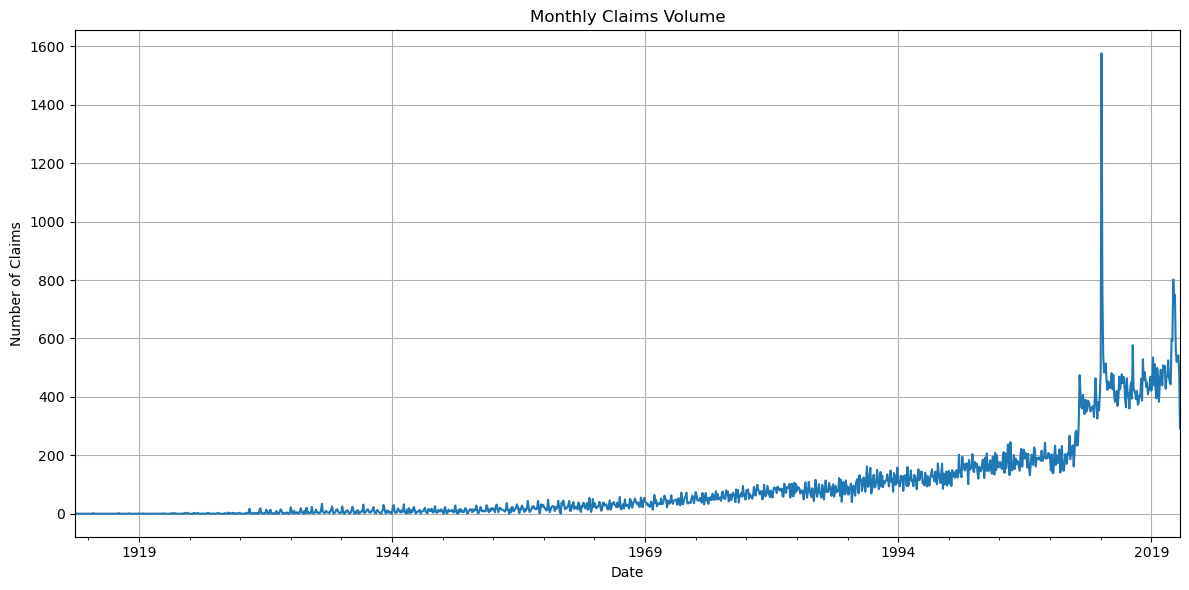

In [58]:
monthly_claims = claims.resample('M', on='SERVICEDATE').size()
plt.figure(figsize=(12, 6))
monthly_claims.plot()
plt.title("Monthly Claims Volume")
plt.xlabel("Date")
plt.ylabel("Number of Claims")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Joining Tables with Patients

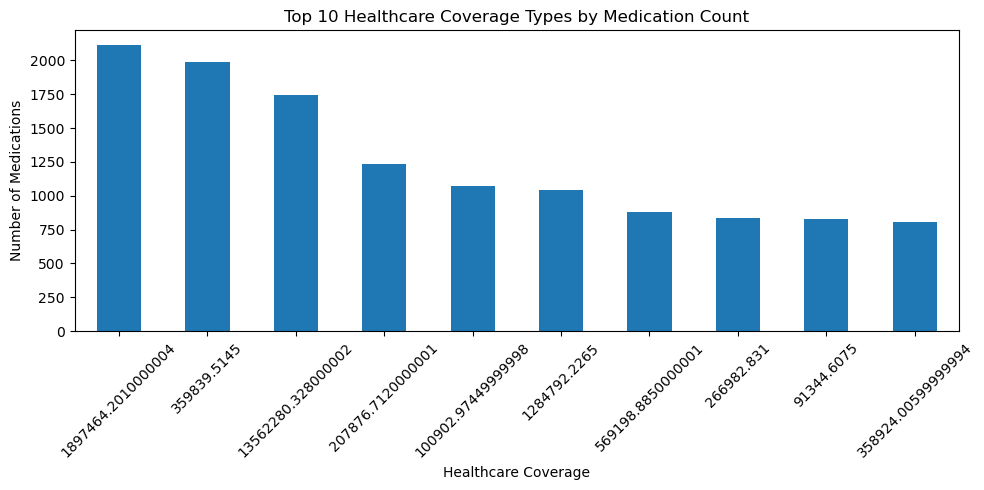

In [63]:
medications_merged = pd.merge(medications, patients, left_on="PATIENT", right_on="Id")
med_by_coverage = medications_merged.groupby("HEALTHCARE_COVERAGE").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
med_by_coverage.plot(kind="bar")
plt.title("Top 10 Healthcare Coverage Types by Medication Count")
plt.xlabel("Healthcare Coverage")
plt.ylabel("Number of Medications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

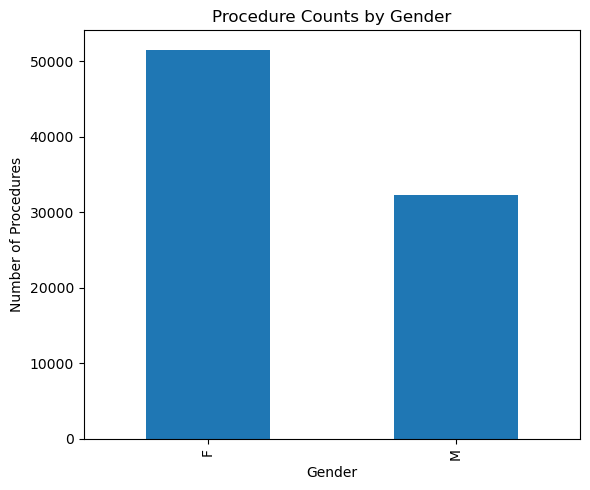

In [64]:
procedures_merged = pd.merge(procedures, patients, left_on="PATIENT", right_on="Id")
proc_by_gender = procedures_merged.groupby("GENDER").size()
plt.figure(figsize=(6, 5))
proc_by_gender.plot(kind="bar")
plt.title("Procedure Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Procedures")
plt.tight_layout()
plt.show()

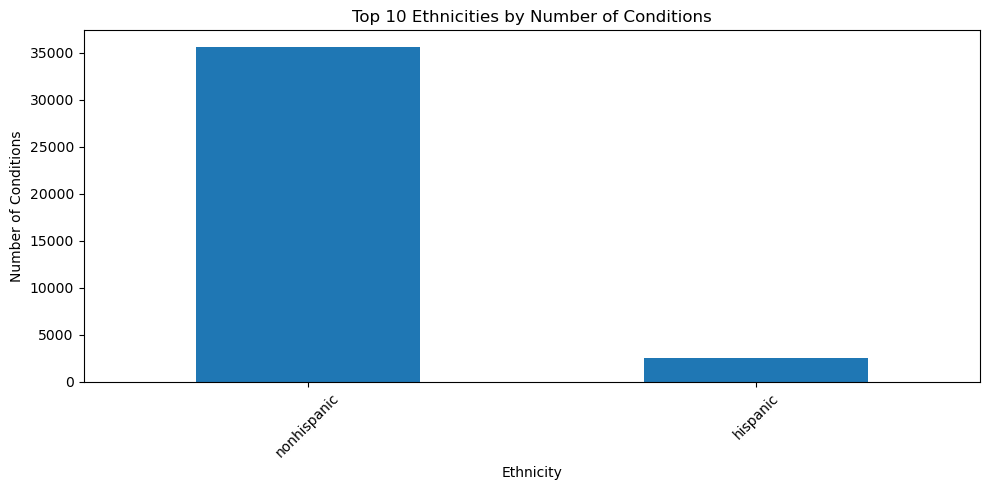

In [66]:
conditions_merged = pd.merge(conditions, patients, left_on="PATIENT", right_on="Id")
cond_by_ethnicity = conditions_merged.groupby("ETHNICITY").size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
cond_by_ethnicity.plot(kind="bar")
plt.title("Top 10 Ethnicities by Number of Conditions")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Conditions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

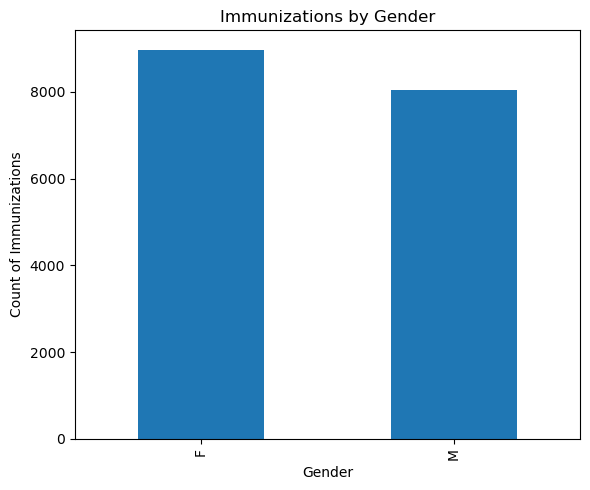

In [67]:
immunizations_merged = pd.merge(immunizations, patients, left_on="PATIENT", right_on="Id")
imm_by_gender = immunizations_merged.groupby("GENDER").size()

plt.figure(figsize=(6, 5))
imm_by_gender.plot(kind="bar")
plt.title("Immunizations by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Immunizations")
plt.tight_layout()
plt.show()

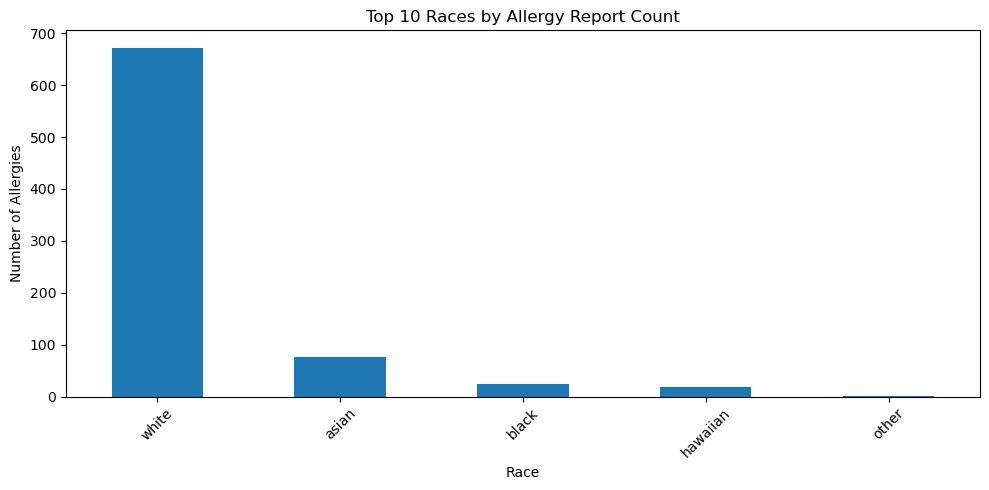

In [68]:
allergies_merged = pd.merge(allergies, patients, left_on="PATIENT", right_on="Id")
allergy_by_race = allergies_merged.groupby("RACE").size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
allergy_by_race.plot(kind="bar")
plt.title("Top 10 Races by Allergy Report Count")
plt.xlabel("Race")
plt.ylabel("Number of Allergies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Medications × Patients (Healthcare Coverage)
The graph shows the dissemination of medication records by healthcare coverage type. Certain coverage types, maybe government or big employers, have a significantly higher number of prescribed medications. This may be related to greater access to care or prevalence of chronic disease in these groups.

2. Procedures × Patients (Gender)
Procedures were more frequently observed in female patients than in male patients. This can be interpreted as gender-specific health care services such as reproductive procedures or the fact that care-seeking behavior, preventive screenings, or chronic disease care vary by gender.

3. Conditions × Patients (Ethnicity)
The analysis showed that non-Hispanic patients had far more recorded medical conditions than Hispanic patients. This could be the outcome of a number of factors like proportion of population, healthcare access, or even variances in documentation and diagnosis.

4. Immunizations × Patients (Gender)
Female patients received more immunizations than male patients. This could be related to vaccine programs focused on women's health (e.g., HPV), mother care, or higher preventive care compliance among women.

5. Allergies × Patients (Race)
White patients described considerably higher rates of allergies than other racial groups. This may be caused by underlying variation in access to care or diagnostic patterns, or cultural and socioeconomic difference in the request for allergy testing and reporting of symptoms.

#### Joining Tables with Encounter